# EDA : 선택적 데이터 분석 -> 특성 공학

피쳐를 뭘쓸껀지  
1. NA가 있는지  
2. 뭐를 Target으로 잡을지 : 타겟의 결과값에대한 데이터가 있는지 없는지가 중요. 타이타닉은 생존,사망 둘중에 하나를 찾는게 제일 편함  
    - classifcation 주관식 정답값이 10퍼센트가 나온거면 높은편.그걸 객관식으로 만들어주는게 중요 범주형으로 나눠서 예측값을 알아야함.
- 타겟컬럼으로 으로사용할때는 factor로 만들어준후 비교해야함.  
 cabin같은경우 비어있는값을 어떻게 해줘야 할지도 정제  
 특성공학..?: 파생되는 데이터들... ex)Embarked에 파생되는 각 나라의 데이터들의 컬럼이 추가될수있다.
3. 데이터가 가장 간단한것부터 접근하는게 제일 좋다.
    Target은 공평해야하고 feature는 불공평해야한다.  
    타겟컬럼을 구하는 과정에 그래프그리는과정은 무조건 있어야함. 보고할때에도 필요함. 피쳐컬럼도 마찬가지. 분류하는 작업이 진짜 중요함.  
    데이터 분석하는 과정에서 정제하는작업은 3개월중에 2개월이 걸리니까 천천히 하기!  
    차트그리는게 진짜 중요!  
    차분하게 하는게 중요함!  
    데이터를 가지고 세세하게 분리해서 하는게 중요함.  
4. 컬럼내용을 이해하는게 제일 중요 , 데이터를 버리는건 타겟으로 쓸수 없을때에 버리기  
***데이터를 보고 주제정하는것도 괜찮아!     
5. 결측치가 30%가 넘으면 못씀. 결측치가 있는 컬럼이나 로우를 버리거나 이것저것 다 해봐야함. 그래프진짜 중요  
6. 처음 데이터 볼때 가장 많이 쓰는 코드는 table, sum, merge.

In [6]:
library(dplyr)

In [3]:
train_df <- read.csv("Rdata/Titanic_train.csv")
head(train_df)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [ ]:
6:4간신히 걸쳤지만 타겟으로 쓸만하겠다!

In [9]:
sum(train_df$Survived == 0)
sum(train_df$Survived == 1)
342 / 549

[1] 549

[1] 342

[1] 0.6229508

In [13]:
sum(train_df$Sex == "female")
sum(train_df$Sex == "male")
314/577

[1] 314

[1] 577

[1] 0.5441941

두배정도 차이가 나네 조금더 비교해보자

In [15]:
sum(train_df$Survived == 1 & train_df$Sex =="female")
sum(train_df$Survived == 1 & train_df$Sex =="male")

[1] 233

[1] 109

차이가 많이나네!

In [16]:
sum(train_df$Survived == 0 & train_df$Sex =="female")
sum(train_df$Survived == 0 & train_df$Sex =="male")

[1] 81

[1] 468

> 피쳐로 쓰기 적합!

- 테이블이 진짜 보기 편해 I LOVE TABLE

In [19]:
table(train_df$Sex, train_df$Survived)

        
           0   1
  female  81 233
  male   468 109

In [27]:
table(train_df$Pclass, train_df$Survived)

   
      0   1
  1  80 136
  2  97  87
  3 372 119

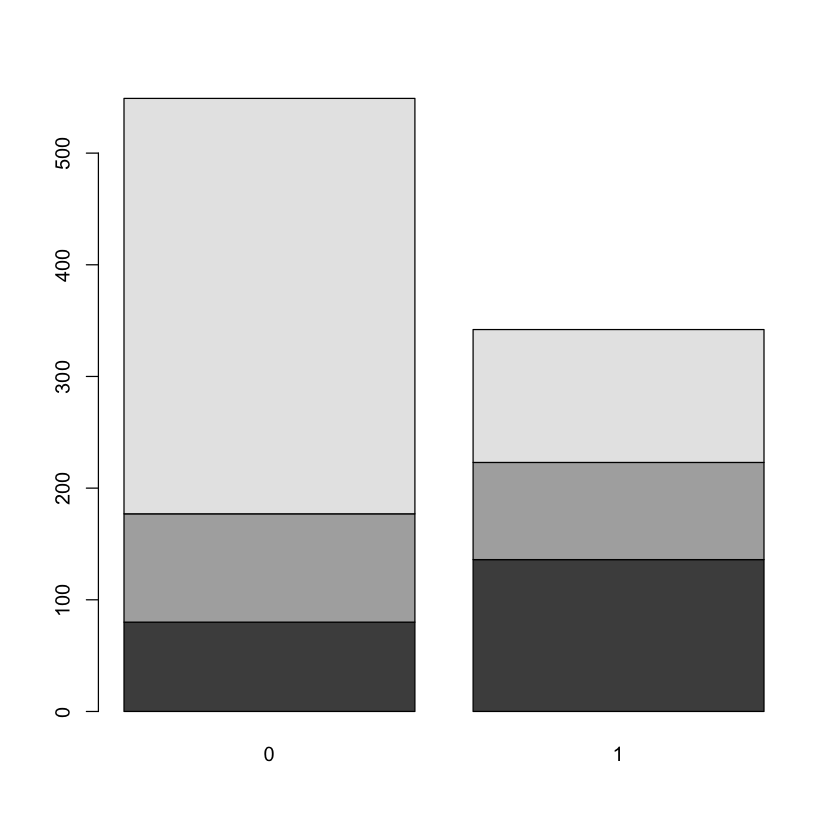

In [28]:
barplot(table(train_df$Pclass, train_df$Survived))